## Dimentionality reduction

Key purpose of multivariate analysis is data preprocessing (data prepration), namely:

Dimentionality reduction and Feature extraction


#### Feature seletion
the task of the selection of input variables;
#### Feature extraction
the task of transferring original input variables to the set of new factors.

### Popular techniques for dimensionality reduction

#### LDA (Linear Discrimenant analysis)
#### PCA (Principle component analysis)
#### K_means clustering

LDA is a supervised Technique. It means idenfitying input and output varibles. LDA can only take the categorical variable as the output varible. 

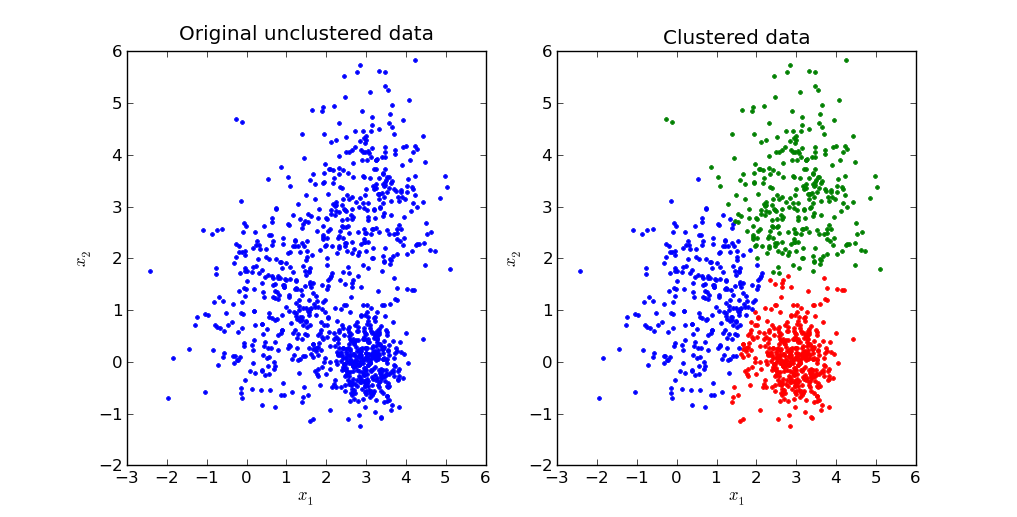

In [6]:
# LDA: Iris Dataset
from pandas import read_csv
data=read_csv('/Users/chensiyu/Desktop/dataset/Iris.csv')
X=data.drop('Species',axis=1) # input variables
y=data['Species'] # output variable 
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import pandas as pd
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning 
df = pd.DataFrame(X_lda)

In [8]:
df.shape

(150, 2)

In [9]:
lda_model.explained_variance_ratio_

array([0.99147248, 0.00852752])

In [11]:
# Apply dt classifier on Iris dataset
import time

In [110]:
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
start = time. time()
acc = [] ### Blank vector
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# split dataset
    model_dt=DecisionTreeClassifier() # model
    dt = model_dt.fit(X_train,y_train) # fit the model
    YPred = dt.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
processing_time=end-start
print(processing_time)

Accuracy using 1000 MC run: 0.9095873015873018
2.177003860473633


In [13]:
# step 2 (LDA + Decision tree)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning 

df=pd.DataFrame(X_lda)
df.columns=[['lda1','lda2']]
df.head(4)

,lda1,lda2
0,8.084953,0.328454
1,7.147163,-0.755473
2,7.511378,-0.238078
3,6.837676,-0.642885


In [14]:
import warnings
warnings.filterwarnings('ignore')

In [111]:
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,\
 classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
start=time. time()
acc = [] ### Blank vector
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)# split dataset
    model_dt=DecisionTreeClassifier() # model
    dt = model_dt.fit(X_train,y_train) # fit the model
    YPred = dt.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
print(end-start)

Accuracy using 1000 MC run: 0.8784285714285716
1.787231206893921


In [17]:
# example 2: LAD on Seed_Data
sd = pd.read_csv('/Users/chensiyu/Desktop/dataset/Seed_Data.csv')
#print(sd.head())
X=sd.drop('target', axis=1)
y=sd['target']
print(y.unique())
X.shape

[0 1 2]


(210, 7)

In [18]:
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning 
df=pd.DataFrame(X_lda)
df.columns=[['lda1','lda2']]
df.head(4)

,lda1,lda2
0,0.431322,-3.447686
1,0.752869,-4.183980
2,1.093932,-2.958675
3,1.768020,-3.252414


In [19]:
lda_model.explained_variance_ratio_

array([0.68141241, 0.31858759])

In [20]:
# Apply logistic regression on Seed_Data with original input variables

In [21]:
import time

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [120]:
start = time. time()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
acc = [] ### Blank vector
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# split dataset
    model_dt=LogisticRegression() # model
    dt = model_dt.fit(X_train,y_train) # fit the model
    YPred = dt.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
print("Accuracy using 100 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 100 MC run: 0.9180793650793653
processing time: 11.303486824035645


In [121]:
# Apply logistic regression on Seed_Data with extracted LDAs
start=time.time()
acc = [] ### Blank vector
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)# split dataset
    model_dt=LogisticRegression() # model
    dt = model_dt.fit(X_train,y_train) # fit the model
    YPred = dt.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
print("Accuracy using 100 MC run:", np.mean(acc))  
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 100 MC run: 0.8926984126984128
processing time: 3.7233171463012695


Conlusion: 
Since using two feature to train the logistic regression classifier, it is faster than traditional implementation.

In [58]:
# credit card analytics
# link for dataset: https://data.world/sonaksh/bank-customer-credit-details/workspace/file?filename=credit_card_dataset.csv

In [59]:
from pandas import read_csv
data=read_csv('/Users/chensiyu/Desktop/dataset/credit_card_dataset.csv')
data.head()
dataset=data.dropna()

In [61]:
X=dataset.drop(['Gender','Loan Amount'], axis=1)
print(X.head())
y=dataset['Gender']
y.value_counts()
X.info()

   Age  Family Size   Income  Expenditure  Use Frequency  Overdue  \
0   30            4  50000.0      22199.0              6        5   
1   44            6  51000.0      19999.0              4        3   
2   30            3  58450.0      27675.0              5        6   
3   29            5  45767.0      12787.0              3        7   
4   34            4  43521.0      11999.0              3        2   

    Debt Record   Returned Cheque   Dishonour of Bill  
0         42898                 6                   9  
1         33999                 1                   5  
2         20876                 3                   1  
3         11000                 0                   4  
4         43898                 1                   2  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 449 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 449 non-null    int64 

In [62]:
# Data Preparation
c=X.columns

#rescale the dataset
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #  normal scaler 


In [64]:
# Fit your data on the scaler object
scaled_X = scaler.fit_transform(X)

from pandas import DataFrame
df=DataFrame(scaled_X)
df.columns=c
df.head()

,Age,Family Size,Income,Expenditure,Use Frequency,Overdue,Debt Record,Returned Cheque,Dishonour of Bill
0,0.230769,0.4,0.023994,0.246521,0.571429,0.500,0.476644,0.666667,1.000000
1,0.589744,0.8,0.025103,0.205431,0.285714,0.250,0.377767,0.111111,0.555556
2,0.230769,0.2,0.033366,0.348798,0.428571,0.625,0.231956,0.333333,0.111111
3,0.205128,0.6,0.019299,0.070731,0.142857,0.750,0.122222,0.000000,0.444444
4,0.333333,0.4,0.016808,0.056013,0.142857,0.125,0.487756,0.111111,0.222222


In [65]:
df.shape

(449, 9)

In [66]:
y.value_counts()

MALE      253
FEMALE    196
Name: Gender, dtype: int64

number of LDAs: min(10,2-1)=1

In [68]:
# Apply the logistic reg on the original dataset
import time

In [127]:
start = time. time()
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
acc = [] ### Blank vector
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)# split dataset
    model_lr=LogisticRegression() # model
    lr = model_lr.fit(X_train,y_train) # fit the model
    YPred = lr.predict(X_test) # predict
    a = accuracy_score(y_test,YPred) # compute accuracy
    acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 1000 MC run: 0.893920634920635
processing time: 3.7939560413360596


In [132]:
# redo the above analysis after lda implementation
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from pandas import DataFrame
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(df, y) # LDA is supervised learning 
DF=DataFrame(X_lda)
DF.head()

,0,1
0,-0.497731,1.155368
1,-0.221445,2.190690
2,0.514918,0.920475
3,0.821258,1.318655
4,-1.225099,1.780802


In [133]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from pandas import DataFrame
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(df, y) # LDA is supervised learning 
DF=DataFrame(X_lda)
DF.head(4)
start = time. time()
# DF: is an extracted feature of scaled input variables 
acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(DF,y,test_size=0.3)# split dataset
  model_dt=LogisticRegression() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 1000 MC run: 0.8922698412698414
processing time: 3.6516292095184326


In [134]:
# Apply adaboostclassifier on the original dataset
from sklearn.ensemble import AdaBoostClassifier
base=LogisticRegression() # model
ada_clf = AdaBoostClassifier(base_estimator=base, n_estimators=10)
start = time. time()

acc = [] ### Blank vector
for i in range(100):
  X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)# split dataset
  
  lr = ada_clf.fit(X_train,y_train) # fit the model
  YPred = lr.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 100 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 100 MC run: 0.8957142857142858
processing time: 2.2190980911254883


In [135]:
# LDA + Adaboostclassifier
start = time. time()
# DF: is an extracted feature of scaled input variables 
acc = [] ### Blank vector
for i in range(100):
  X_train,X_test,y_train,y_test=train_test_split(DF,y,test_size=0.3)# split dataset
   
  dt = ada_clf.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 100 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 100 MC run: 0.8974603174603175
processing time: 2.149662971496582


Conclusion: LDA+Logistic regression provide higher accuracy and lower computational load

In [82]:
# Apply PCA to extract the most 2 important features
data=read_csv('/Users/chensiyu/Desktop/dataset/Seed_Data.csv')
data.head()
X=data.drop(['target'],axis=1)
y=data['target']
X.shape
# y.unique()

array([0, 1, 2])

In [83]:
#1 apply PCA 
pca = PCA(2)
model=pca.fit_transform(X)
# access values and vectors
df=pd.DataFrame(model) 
df.columns=['F1','F2']
df

,F1,F2
0,0.663448,-1.417321
1,0.315667,-2.689229
2,-0.660499,-1.131506
3,-1.055276,-1.621190
4,1.619999,-2.183384
...,...,...
205,-3.041872,-0.473126
206,-4.109063,0.109341
207,-2.500034,4.307965
208,-3.332079,-0.525290


In [84]:
#1 apply LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
X_lda = lda_model.fit_transform(X, y) # LDA is supervised learning 
LDA=pd.DataFrame(X_lda)
LDA.columns=[['lda1','lda2']]
 
LDA.head()

,lda1,lda2
0,0.431322,-3.447686
1,0.752869,-4.183980
2,1.093932,-2.958675
3,1.768020,-3.252414
4,-0.494411,-3.438485


In [85]:
pca = PCA()
model=pca.fit_transform(X)
pca.explained_variance_ratio_ 

array([8.29385197e-01, 1.63632452e-01, 5.65790880e-03, 9.90306086e-04,
       2.11180347e-04, 1.20677139e-04, 2.27879552e-06])

In [86]:
# select the first and second pca to cover at least 95% variance
#b lda
lda_model.explained_variance_ratio_ 

array([0.68141241, 0.31858759])

In [87]:
# apply decision tree with PCA at the level 95%, we use the first 2 pcas as the input features for the classifier
#PCA+DT
from sklearn.tree import DecisionTreeClassifier

start = time. time()

acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 1000 MC run: 0.8778888888888892
processing time: 1.8159151077270508


In [89]:
#LDA+DT
from sklearn.tree import DecisionTreeClassifier

start = time. time()

acc = [] ### Blank vector
for i in range(1000):
  X_train,X_test,y_train,y_test=train_test_split(LDA,y,test_size=0.3)# split dataset
  model_dt=DecisionTreeClassifier() # model
  dt = model_dt.fit(X_train,y_train) # fit the model
  YPred = dt.predict(X_test) # predict
  a = accuracy_score(y_test,YPred) # compute accuracy
  acc.append(a) # append accuracy
print("Accuracy using 1000 MC run:", np.mean(acc))  # average of accuracy to stablize the result
end = time. time()
proc_time=end-start
print('processing time:', proc_time)

Accuracy using 1000 MC run: 0.9568888888888889
processing time: 1.8473410606384277


Apply kmeans clustering with three clusters on seed_data and print out the centroids for each cluster:

In [97]:
#data prepration 
from pandas import read_csv, DataFrame
data=read_csv('/Users/chensiyu/Desktop/dataset/Seed_Data.csv')
data.head()
X=data.drop('target',axis=1) # input variables 
X.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [98]:
from sklearn.cluster import KMeans
model=KMeans(3)
model.fit(X) # unsupervised learning algorithm
centroids  = model.cluster_centers_   
centroids

array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

In [101]:
X['kmeans_cluster'] = model.labels_
X.head()

,A,P,C,LK,WK,A_Coef,LKG,kmeans_cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,2
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,2
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,2
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,2
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,2


In [102]:
! pip install kneed

In [103]:
from kneed import KneeLocator

In [107]:
# A list holds the SSE values for each k
sse = [] # sum of squared error
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X) # unsupervised 
    sse.append(kmeans.inertia_)

In [108]:
knee = KneeLocator(range(1,11),sse,curve='convex',direction='decreasing')
knee.elbow

3

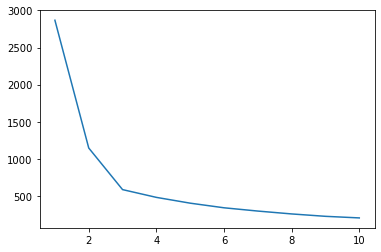

In [109]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),sse)